# Purpose

Overlay 2 images in one plot, with the top image having selected regions of transparency.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


# Background image

In [46]:
n_x, n_y = 500, 400

background = np.zeros((n_y, n_x))
background[:, 50:] = np.linspace(0, 0.5, 450)
temp = np.linspace(0, 0.5, 400)
# print(temp)
for i in range(0, n_x):
    background[:, i] += temp
background[100:150, 200:350] = 0
    
background.shape

(400, 500)

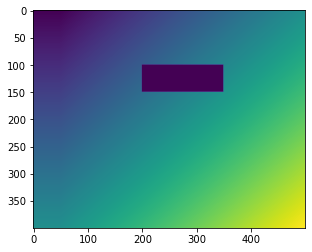

In [47]:
fig, ax = plt.subplots()
ax.imshow(background)

# Foreground image overlaid on background image

In [48]:
foreground = np.zeros((n_y, n_x, 4)) + 0.8
foreground[:, :, 3] = 0
foreground[50:150, 50:150, 3] = 1
foreground[220:280, 350:470, 3] = 1
foreground.shape

(400, 500, 4)

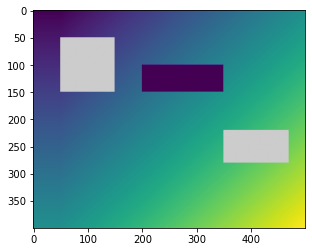

In [49]:
fig, ax = plt.subplots()
ax.imshow(background)
ax.imshow(foreground);

# Foreground image only where background image = 0

In [63]:
mask = np.ma.masked_equal(background, 0)
mask.shape

(400, 500)

In [64]:
mask

masked_array(
  data=[[--, --, --, ..., 0.4977728285077951, 0.4988864142538975, 0.5],
        [0.0012531328320802004, 0.0012531328320802004,
         0.0012531328320802004, ..., 0.4990259613398753,
         0.5001395470859777, 0.5012531328320802],
        [0.002506265664160401, 0.002506265664160401,
         0.002506265664160401, ..., 0.5002790941719555,
         0.5013926799180579, 0.5025062656641603],
        ...,
        [0.49749373433583954, 0.49749373433583954, 0.49749373433583954,
         ..., 0.9952665628436346, 0.996380148589737, 0.9974937343358395],
        [0.49874686716791977, 0.49874686716791977, 0.49874686716791977,
         ..., 0.9965196956757149, 0.9976332814218173, 0.9987468671679198],
        [0.5, 0.5, 0.5, ..., 0.9977728285077951, 0.9988864142538976, 1.0]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, Fals

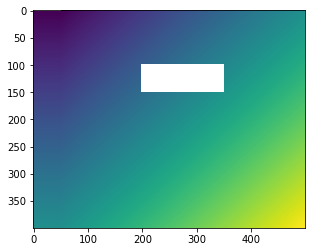

In [65]:
fig, ax = plt.subplots()
ax.imshow(mask)


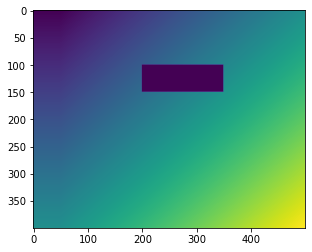

In [78]:
fig, ax = plt.subplots()
ax.imshow(background)


In [75]:
# Returns array of indices for where 2D array background has zero elements
indices_of_zeros = np.argwhere(background == 0)
indices_of_zeros

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       ...,
       [149, 347],
       [149, 348],
       [149, 349]])

In [79]:
foreground = np.zeros((n_y, n_x, 4)) + 0.8
# foreground

In [80]:
foreground[:, :, 3] = 0
# foreground

In [81]:
foreground[indices_of_zeros][3] = 1
foreground[149, 347]

array([0.8, 0.8, 0.8, 0. ])

In [82]:
foreground[indices_of_zeros]

array([[[[0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         ...,
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ]],

        [[0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         ...,
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ]]],


       [[[0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         ...,
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ]],

        [[0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         ...,
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ]]],


       [[[0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         ...,
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8, 0.8, 0. ],
         [0.8, 0.8,

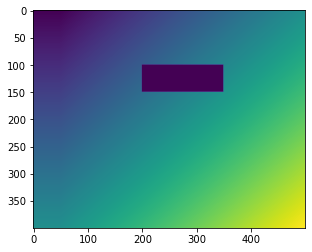

In [77]:
fig, ax = plt.subplots()
ax.imshow(background)
ax.imshow(foreground)


In [83]:
temp = background == 0
temp

array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [99]:
foreground = np.zeros((n_y, n_x, 4)) + 0.8
foreground[:, :, 3] = 0
foreground[temp]

# Currently working on

## Create background image

100
(400, 500)


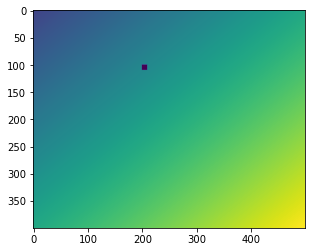

In [139]:
n_x, n_y = 500, 400

background = np.zeros((n_y, n_x))
background[:, :] = np.linspace(0.1, 0.5, 500)
temp = np.linspace(0.1, 0.5, 400)
# print(temp)
for i in range(0, n_x):
    background[:, i] += temp
background[100:110, 200:210] = 0

print(10 * 10)
print(background.shape)

fig, ax = plt.subplots()
ax.imshow(background);

In [140]:
foreground = np.zeros((n_y, n_x, 4))
foreground[:, :, 3] = 0

temp = np.where(background == 0)
print(len(temp), len(temp[0]), len(temp[1]))
temp

2 100 100


(array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 101, 101, 101,
        101, 101, 101, 101, 101, 101, 101, 102, 102, 102, 102, 102, 102,
        102, 102, 102, 102, 103, 103, 103, 103, 103, 103, 103, 103, 103,
        103, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 105, 105,
        105, 105, 105, 105, 105, 105, 105, 105, 106, 106, 106, 106, 106,
        106, 106, 106, 106, 106, 107, 107, 107, 107, 107, 107, 107, 107,
        107, 107, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 109,
        109, 109, 109, 109, 109, 109, 109, 109, 109]),
 array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 200, 201, 202,
        203, 204, 205, 206, 207, 208, 209, 200, 201, 202, 203, 204, 205,
        206, 207, 208, 209, 200, 201, 202, 203, 204, 205, 206, 207, 208,
        209, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 200, 201,
        202, 203, 204, 205, 206, 207, 208, 209, 200, 201, 202, 203, 204,
        205, 206, 207, 208, 209, 200, 201, 202, 203, 204, 205, 206, 2

In [141]:
indices = []
grey_value = 0.8
for y, x in zip(temp[0], temp[1]):
    foreground[y, x] = [grey_value, grey_value, grey_value, 1]
    indices.append([x, y])
    # print(indices[-1])
    
# foreground[indices] = [grey_value, grey_value, grey_value, 1]
foreground[98:102, 198:202]

array([[[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0.8, 0.8, 0.8, 1. ],
        [0.8, 0.8, 0.8, 1. ]],

       [[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0.8, 0.8, 0.8, 1. ],
        [0.8, 0.8, 0.8, 1. ]]])

In [142]:
foreground.shape

(400, 500, 4)

In [143]:
# foreground[:, :, 3] = 1
# fig, ax = plt.subplots()
# ax.imshow(foreground)


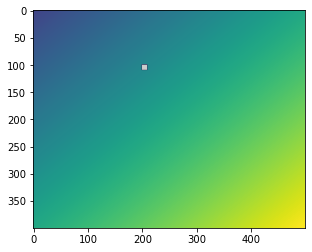

In [144]:
fig, ax = plt.subplots()
ax.imshow(background)
ax.imshow(foreground)


## Change size of zero regions

(400, 500)


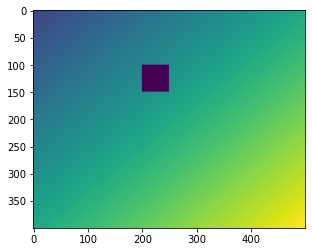

In [157]:
n_x, n_y = 500, 400

background = np.zeros((n_y, n_x))
background[:, :] = np.linspace(0.1, 0.5, 500)
temp = np.linspace(0.1, 0.5, 400)
# print(temp)
for i in range(0, n_x):
    background[:, i] += temp
background[100:150, 200:250] = 0

# print(20 * 20)
print(background.shape)

fig, ax = plt.subplots()
ax.imshow(background);

In [158]:
foreground = np.zeros((n_y, n_x, 4))
foreground[:, :, 3] = 0

temp = np.where(background == 0)
print(len(temp), len(temp[0]), len(temp[1]))
# temp

2 2500 2500


In [159]:
# indices = []
grey_value = 0.8
for y, x in zip(temp[0], temp[1]):
    foreground[y, x] = [grey_value, grey_value, grey_value, 1]
    # indices.append([x, y])
    # print(indices[-1])
    
# foreground[indices] = [grey_value, grey_value, grey_value, 1]
foreground[98:102, 198:202]

array([[[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0.8, 0.8, 0.8, 1. ],
        [0.8, 0.8, 0.8, 1. ]],

       [[0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. ],
        [0.8, 0.8, 0.8, 1. ],
        [0.8, 0.8, 0.8, 1. ]]])

In [160]:
foreground.shape

(400, 500, 4)

In [161]:
# foreground[:, :, 3] = 1
# fig, ax = plt.subplots()
# ax.imshow(foreground)


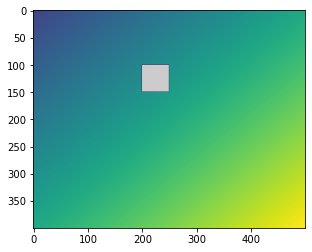

In [162]:
fig, ax = plt.subplots()
ax.imshow(background)
ax.imshow(foreground);


## This one works!

(400, 500)


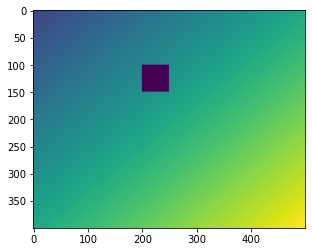

In [168]:
n_x, n_y = 500, 400

background = np.zeros((n_y, n_x))
background[:, :] = np.linspace(0.1, 0.5, 500)
temp = np.linspace(0.1, 0.5, 400)
# print(temp)
for i in range(0, n_x):
    background[:, i] += temp
background[100:150, 200:250] = 0

# print(20 * 20)
print(background.shape)

fig, ax = plt.subplots()
ax.imshow(background);

2 2500 2500


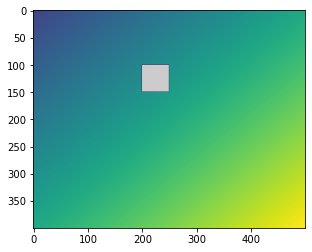

In [169]:
foreground = np.zeros((n_y, n_x, 4))

temp = np.where(background == 0)
print(len(temp), len(temp[0]), len(temp[1]))
# temp


# indices = [[y, x] for y, x in zip(temp[0], temp[1])]
grey_value = 0.8
foreground[np.ix_(*temp)] = [grey_value, grey_value, grey_value, 1]
# foreground[np.ix_(temp[0], temp[1])] = [grey_value, grey_value, grey_value, 1]

fig, ax = plt.subplots()
ax.imshow(background)
ax.imshow(foreground);
